**Personas atendidas en los puntos Vive Digital por edad-Pereira**

**Problema o pregunta de investigación que guiará el proyecto**.<BR>

¿Qué características sociodemográficas (edad, género y nivel educativo) predominan en los usuarios de los Puntos Vive Digital y qué implicaciones tiene esto para el diseño de programas de inclusión digital?


En este dataset se busca caracterizar a las Personas atendidas en los puntos vive digital de la ciudad de Pereira mediante una serie de datos relacionados a los encuestados, esto con el fin de validar cuales son los puntos mas visitados y que tipo de personas los usan mediante su edad otra informacion como es nivel de estudio, actividad que desarrolla


se utilizara una base de datos llamada :Personas_atendidas_en_los_puntos_vive_digital_20250821

la cual tiene un total de 4711 filas y 9 columnas

que contiene las siguientes variables:<br>
- area<br>
- actividad<br>
- grupo poblacional<br>
- establecimiento <br>
- tipo de documento <br>
- sexo <br>
- edad<br>
- etnia<br>
- nivel de estudio<br>

entre sus tipos de datos se encuentran variable de todo tipo: numericas, alfanumericas


In [2]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Carga de datos
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQK9aOyn4qJN_qGrLDpkkFPQeKy6BAVUVN1p1QU7_xgnKaik3wocHiB7qc5FLDRl2fjvfFfjTrvAv66/pub?output=csv')


In [ ]:
# nombres de las columnas
column_names = data.columns

print(column_names)

Index(['Area', 'Actividad', 'Grupo Poblacional', 'Establecimiento',
       'Tipo Documento', 'Sexo', 'Edad', 'Etnia', 'Nivel Estudio'],
      dtype='object')


In [3]:
data.head(10)

,Area,Actividad,Grupo Poblacional,Establecimiento,Tipo Documento,Sexo,Edad,Etnia,Nivel Estudio
0,Puntos Vive Digital,primaria,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Femenino,80,NaN,primaria
1,Puntos Vive Digital,Tecnico,General,SAN FERNANDO CUBA,Cédula Ciudadanía,Masculino,59,NaN,Tecnico
2,Puntos Vive Digital,Secundaria,General,CENTRO CULUTRAL LUCY TEJADA,Tarjeta de Identidad,Masculino,13,NaN,Secundaria
3,Puntos Vive Digital,Secundaria,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Masculino,42,NaN,Secundaria
4,Puntos Vive Digital,secundaria,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Femenino,40,NaN,secundaria
5,Puntos Vive Digital,secundaria,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Femenino,64,NaN,secundaria
6,Puntos Vive Digital,tecnologico,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Masculino,71,NaN,tecnologico
7,Puntos Vive Digital,secundaria,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Femenino,31,NaN,secundaria
8,Puntos Vive Digital,universitario,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Femenino,62,NaN,universitario
9,Puntos Vive Digital,secundaria,General,CENTRO CULUTRAL LUCY TEJADA,Cédula Ciudadanía,Femenino,54,NaN,secundaria


In [ ]:
print(f"Número de registros: {data.shape[0]}")
print(f"Número de variables: {data.shape[1]}")

Número de registros: 4711
Número de variables: 9


In [ ]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(data.dtypes.value_counts())


Tipos de datos por variable:
object    8
int64     1
Name: count, dtype: int64


In [ ]:
# Clasificación de variables
categoricas = data.select_dtypes(include=['object']).columns.tolist()
numericas = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("🔹 Variables categóricas:")
print("\n".join([f"- {col}" for col in categoricas]))

print("\n🔸 Variables numéricas:")
print("\n".join([f"- {col}" for col in numericas]))

🔹 Variables categóricas:
- Area
- Actividad
- Grupo Poblacional
- Establecimiento
- Tipo Documento
- Sexo
- Etnia
- Nivel Estudio

🔸 Variables numéricas:
- Edad


In [ ]:


# Descripción general
print("\nDescripción de variables numéricas:")
print(data.describe())




Descripción de variables numéricas:
              Edad
count  4711.000000
mean     29.371259
std      22.073318
min     -60.000000
25%      13.000000
50%      19.000000
75%      46.000000
max      87.000000


In [ ]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = data.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
Etnia            3494
Nivel Estudio     147
Actividad         147
dtype: int64


In [4]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(data.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
Edad                 83
Nivel Estudio        13
Actividad            13
Establecimiento      12
Tipo Documento        6
Etnia                 5
Sexo                  2
Area                  1
Grupo Poblacional     1
dtype: int64


In [8]:
# Variables más importantes (yo hice selección manual)
variables_clave = ['Edad', 'Sexo', 'Nivel Estudio', 'Actividad', 'Etnia']
print("\nVista rápida de variables clave:")
print(data[variables_clave].head())
# Vista rápida de las variables clave
print("\nEstadísticas descriptivas de variables clave:")
print(data[variables_clave].describe())


Vista rápida de variables clave:
   Edad       Sexo Nivel Estudio   Actividad Etnia
0    80   Femenino      primaria    primaria   NaN
1    59  Masculino       Tecnico     Tecnico   NaN
2    13  Masculino    Secundaria  Secundaria   NaN
3    42  Masculino    Secundaria  Secundaria   NaN
4    40   Femenino    secundaria  secundaria   NaN

Estadísticas descriptivas de variables clave:
              Edad
count  4711.000000
mean     29.371259
std      22.073318
min     -60.000000
25%      13.000000
50%      19.000000
75%      46.000000
max      87.000000


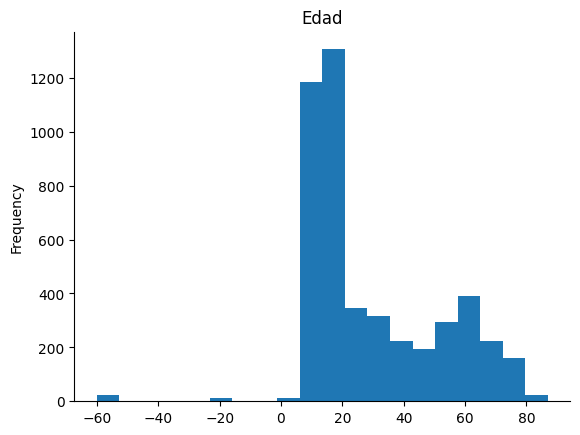

In [ ]:
# @title Edad

from matplotlib import pyplot as plt
data['Edad'].plot(kind='hist', bins=20, title='Edad')
plt.gca().spines[['top', 'right',]].set_visible(False)

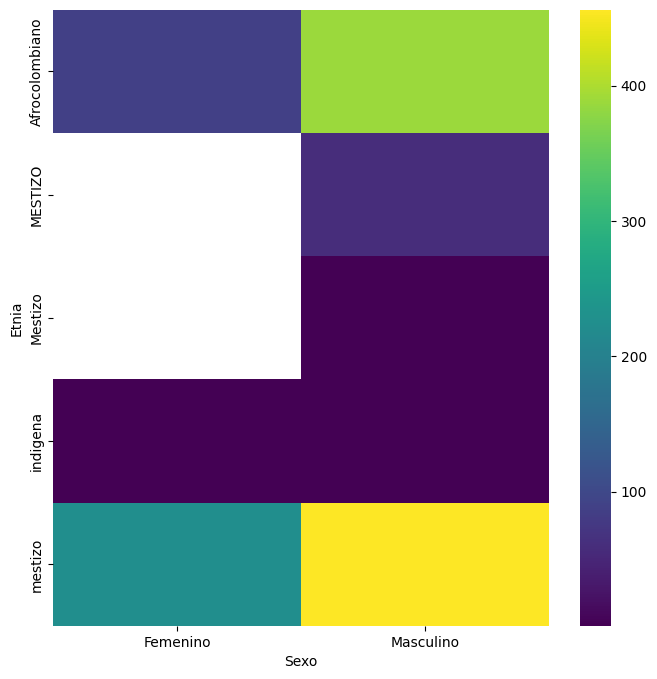

In [7]:
# @title Sexo vs Etnia

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Etnia'].value_counts()
    for x_label, grp in data.groupby('Sexo')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Sexo')
_ = plt.ylabel('Etnia')

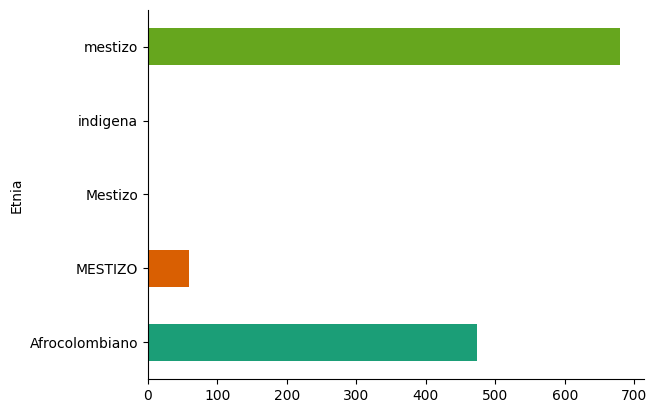

In [6]:
# @title Etnia

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Etnia').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

/tmp/ipython-input-1055789272.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Edad', y='Etnia', inner='box', palette='Dark2')


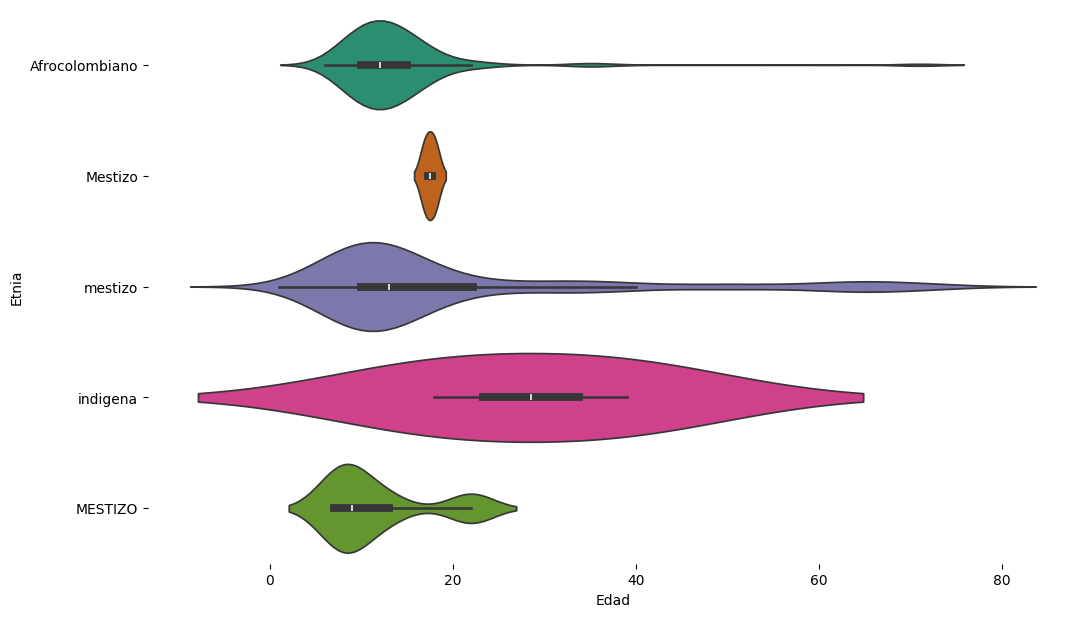

In [ ]:
# Etnia vs Edad

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Etnia'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Edad', y='Etnia', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-540436478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Edad', y='Sexo', inner='box', palette='Dark2')


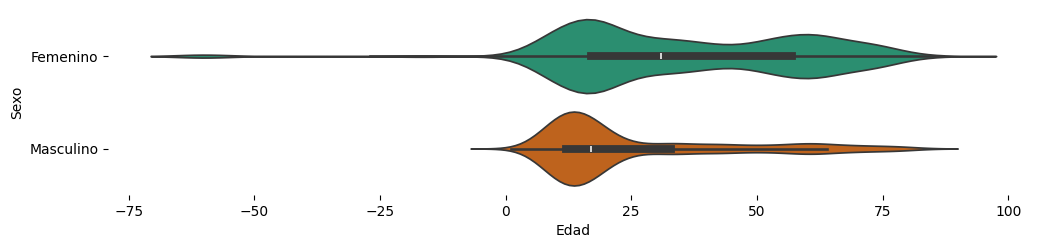

In [5]:
#Sexo vs Edad

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Sexo'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Edad', y='Sexo', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-2331698453.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Edad', y='Actividad', inner='box', palette='Dark2')


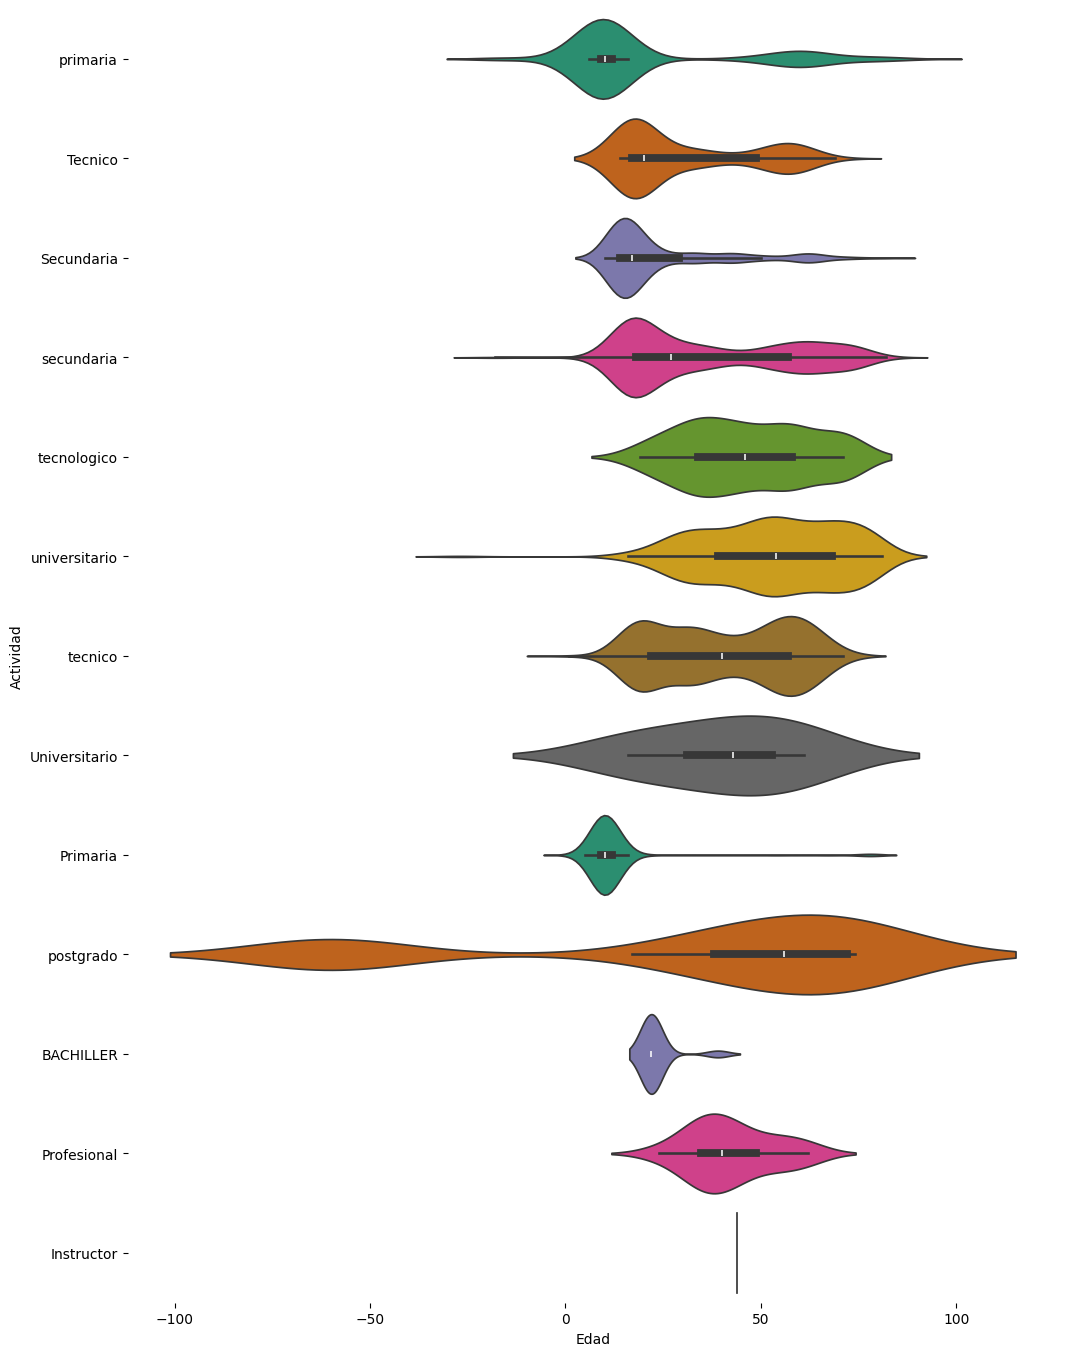

In [ ]:
#Etnia vs Edad

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Actividad'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Edad', y='Actividad', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

INTERPRETACIONES INICIALES:

- SEGUN LA VARIABLE EDAD PODEMOS VER QUE LA MAYORI DE ENCUESTADOS SE ENCUENTRAN ENTRE LOS 10 Y LOS 20 AÑOS DE EDAD
-PODEMOS OBSERVAR QUE LAS PERSONAS ENCUESTADAS SE ENCUENTRA EN LOS GRUPOS QUE YA SE ENCUENTRAN EN UN NIVEL DE ESTUDIO SUPERIOR AL BACHILLERATO, TALES COMO POSTGRADOS, UNIVERSITARIOS, PROFESIONALES.
- podemos observar en algunos graficos como varian por ejemplo algunos datos si los comparamos entre si como la etnia en la cual se evidencia alta  participacion o datos por parte mestizos y una baja árticipacion por parte  de los indigenas

¿Qué limitaciones tiene la base de datos?
- Inicialmente se puede ver que la base de datos seleccionada presenta errores ya que en la columna edad se pueden ver datos negativos lo cual no seria posible
- tambien se notan campos en los graficos que se repiten ya que llevan una diferencia en su nombre como que unos tienen mayusculas y otros no lo que hace que se dividan los graficos en varias variables relacionadas al mismo tema


¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?
- Las mujeres hacen mayor uso de los Puntos Vive Digital que los hombres.
- A mayor edad se evidencia un nivel de estudios mas significativo


CONCLUSIONES :

en la exploracion de los datos se muestra una tendencia a que las personas en el rango de edad entre 20 - 30 suelen usar mas estos servicios- aunque eso no implicaria nada certero ya que pueden haber varios factores que influyan en esto, a mi parecer puede ser tambien que tienen un poco mas de tiempo disponible o conocimiento acerca del estas actividades en comparacion de los demas, asi como la accesibilidad comparada con otras etnias como los indigenas que puede que no tengan facil acceso a estos recursos

por otro lado se nota mas interes por el genero femenino hacia estos temas en comparacion del genero masculino
algunos datos relevantes son :

- Edad:La mayoría de los encuestados se concentran entre los 10 y 20 años, lo que muestra que los Puntos Vive Digital están siendo utilizados principalmente por población joven.

- Nivel educativo: Se observa una importante participación de personas en niveles superiores al bachillerato (universitarios, técnicos, profesionales), lo que sugiere que no solo acuden personas con baja escolaridad.

- Participación sociodemográfica: Se percibe mayor participación de mujeres y de ciertos grupos étnicos (mestizos), mientras que otros (como indígenas) presentan menor presencia.

REFERENCIAS:
- FUENTE DE LOS DATOS

  https://www.datos.gov.co/

- DATASET : Personas atendidas en los puntos Vive Digital por edad-Pereira
- (S/f). Gov.co. Recuperado el 22 de agosto de 2025, de https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Personas-atendidas-en-los-puntos-Vive-Digital-por-/akzj-5x

